In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [197]:
Books_path = r"C:\Users\ASUS\Desktop\Book_Recommender\data\archive\Books.csv"
Ratings_path = r"C:\Users\ASUS\Desktop\Book_Recommender\data\archive\Ratings.csv"
Users_path = r"C:\Users\ASUS\Desktop\Book_Recommender\data\archive\Users.csv"
Books = pd.read_csv(Books_path,delimiter=",",encoding="latin-1")
Ratings = pd.read_csv(Ratings_path,delimiter=",",encoding="latin-1")
Users = pd.read_csv(Users_path,delimiter=",",encoding="latin-1")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4404\990736017.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Books = pd.read_csv(Books_path,delimiter=",",encoding="latin-1")


In [198]:
print("Books dataset:")
print(Books.head())
print("<------------->")

# print("Users dataset:")
# print(Users.head())
# print("<------------->")

# print("Ratings dataset:")
# print(Ratings.head())



Books dataset:
         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://ima

In [199]:
print(Books.shape)
print(Users.shape)
print(Ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [200]:
Users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Popluarity Based Recommender System

In [201]:
Ratings_with_name = Ratings.merge(Books, on='ISBN')

In [202]:
num_rating_df = (
    Ratings_with_name.groupby('Book-Title')
    .count()['Book-Rating']
    .reset_index()
    .rename(columns={'Book-Rating': 'num_ratings'})
)

In [203]:
avg_rating_df = (
    Ratings_with_name.groupby('Book-Title')['Book-Rating']
    .mean()
    .reset_index()
    .rename(columns={'Book-Rating': 'avg_ratings'})
)



In [204]:
popular_df = num_rating_df.merge(avg_rating_df, on='Book-Title')

# 5. Filter books with at least 250 ratings
popular_df = popular_df[popular_df['num_ratings'] >= 250]

# 6. Merge back with Books to get Author and Image URL
popular_df = popular_df.merge(
    Books[['Book-Title', 'Book-Author', 'Image-URL-M']], 
    on='Book-Title'
).drop_duplicates('Book-Title')

# 7. Sort and pick top 50
popular_df = popular_df.sort_values('avg_ratings', ascending=False).head(50)

print(popular_df.head(10))

                                            Book-Title  num_ratings  \
226  Harry Potter and the Prisoner of Azkaban (Book 3)          428   
220       Harry Potter and the Goblet of Fire (Book 4)          387   
229     Harry Potter and the Sorcerer's Stone (Book 1)          278   
222  Harry Potter and the Order of the Phoenix (Boo...          347   
217   Harry Potter and the Chamber of Secrets (Book 2)          556   
536  The Hobbit : The Enchanting Prelude to The Lor...          281   
488  The Fellowship of the Ring (The Lord of the Ri...          368   
233  Harry Potter and the Sorcerer's Stone (Harry P...          575   
657     The Two Towers (The Lord of the Rings, Part 2)          260   
678                              To Kill a Mockingbird          510   

     avg_ratings     Book-Author  \
226     5.852804   J. K. Rowling   
220     5.824289   J. K. Rowling   
229     5.737410   J. K. Rowling   
222     5.501441   J. K. Rowling   
217     5.183453   J. K. Rowling   
53

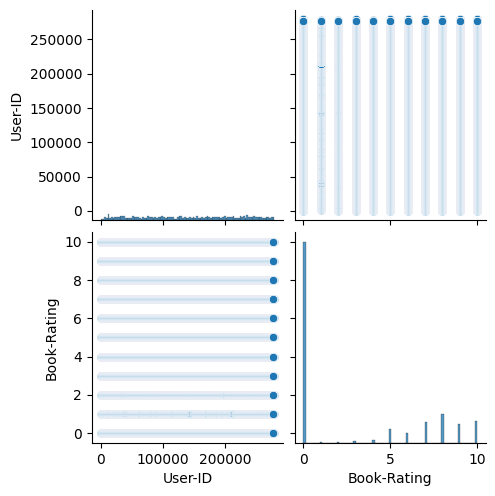

In [205]:
sns.pairplot(Ratings_with_name)

COLLABORATIVE FILTERING BASED RECOMMENDER SYSTEM

In [206]:
Ratings_with_name.groupby('Book-Title').count()['Book-Rating'].sort_values(ascending=False).head(10)

Book-Title
Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   898
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               815
The Secret Life of Bees                             774
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 670
Name: Book-Rating, dtype: int64

In [207]:
X=Ratings_with_name.groupby('User-ID').count()['Book-Rating']>200

padhe_likhe_users=X[X].index

In [208]:
filtered_rating=Ratings_with_name[Ratings_with_name["User-ID"].isin(padhe_likhe_users)]

In [209]:
y=filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books=y[y].index

In [210]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [211]:
final_ratings=filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [212]:
# final_ratings=filtered_rating.drop_duplicates(['User-ID','Book-Title'])

In [213]:
pt=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')


In [214]:
pt.fillna(0,inplace=True)

In [215]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [216]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores=cosine_similarity(pt)
similarity_scores.shape

(706, 706)

In [217]:
def recommend(book_name):
    index = np.where(pt.index==book_name)[0][0]
    recommendation_list=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    for i in recommendation_list:
        print(pt.index[i[0]])


In [218]:
recommend("1984")

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [219]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(Books,open('books.pkl','wb'))